In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
sb.set_palette(sb.color_palette("Set2"))

# Additional Libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
import xgboost as xgb # Run "!pip install xgboost"

# Import the Clean Dataset
df = pd.read_csv('datasets/student-dropout-academic-success-clean.csv')
student_df = df.iloc[:,[1, 13, 14, 15, 16, 17, 22, 23, 28, 29, 34]].copy()
student_df["Target"] = student_df["Target"].map({
    "Dropout": 1,
    "Graduate": 0
})

In [2]:
predictors = student_df.iloc[:, 0:10] # Predictors
response = student_df.iloc[:, -1] # Response = Target

# Partition Dataset into 2 random portions - 80% Train, 20% Test
predictors_train, predictors_test, response_train, response_test = train_test_split(predictors, response, test_size = 0.2)

In [3]:
# Check sample sizes
print("Train Set :", predictors_train.shape, response_train.shape)
print("Test Set  :", predictors_test.shape, response_test.shape)

Train Set : (2904, 10) (2904,)
Test Set  : (726, 10) (726,)


#### Machine Learning Model

**Models:**
- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier
- AdaBoost
- XGBoost

**Metric:**
- Accuracy Score with CV
- Precision Score
- Recall Score
- Explained Variance (R^2)
- Root Mean Squared Error (RMSE)

#### Logistic Regression

In [4]:
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(predictors_train, response_train)

LogisticRegression(max_iter=1000)

In [5]:
# Coefficients of the Logistic Regression line
print('Coefficients \t: a = ', logreg.coef_)
print('Intercept \t: b = ', logreg.intercept_)

Coefficients 	: a =  [[ 0.07180934  0.97241512 -2.51388188  0.3449946  -1.13758391  0.03170302
   0.07081551  0.06246725 -0.57514209 -0.11294718]]
Intercept 	: b =  [3.18689199]


In [23]:
logreg_response_train_pred = logreg.predict(predictors_train)
logreg_response_test_pred = logreg.predict(predictors_test)

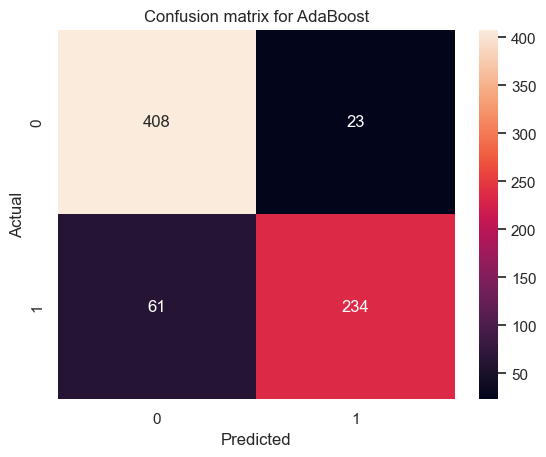

In [26]:
sb.heatmap(confusion_matrix(response_test, logreg_response_test_pred), annot = True, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for AdaBoost')
plt.show()

In [48]:

scores = cross_val_score(logreg, predictors_train, response_train, cv=10)
mse_train = np.mean(np.square(np.array(response_train) - np.array(logreg_response_train_pred)))

print("Explained Variance (R^2):\t", logreg.score(predictors_train, response_train))
print("Mean Squared Error (MSE):\t", mse_train)
print("Root Mean Squared Error (RMSE):\t", np.sqrt(mse_train), "\n")

print("Accuracy Score without CV: \t",accuracy_score(response_test, logreg_response_test_pred))
print("Accuracy Score with CV: \t",scores.mean())
print("Precision Score: \t\t", precision_score(response_test, logreg_response_test_pred, average = 'macro'))
print("Recall Score: \t\t\t", recall_score(response_test, logreg_response_test_pred, average = 'macro'))
print("F1 Score: \t\t\t", f1_score(response_test, logreg_response_test_pred, average = 'macro'))

Explained Variance (R^2):	 0.8836088154269972
Mean Squared Error (MSE):	 0.11639118457300275
Root Mean Squared Error (RMSE):	 0.3411615227029607 

Accuracy Score without CV: 	 0.8842975206611571
Accuracy Score with CV: 	 0.8801564166370422
Precision Score: 		 0.8902209353455071
Recall Score: 			 0.8699280349207598
F1 Score: 			 0.8772463768115942


#### Decision Tree Classifier

In [9]:
dectree = DecisionTreeClassifier()
dectree.fit(predictors_train, response_train)

DecisionTreeClassifier()

In [28]:
dectree_response_train_pred = dectree.predict(predictors_train)
dectree_response_test_pred = dectree.predict(predictors_test)

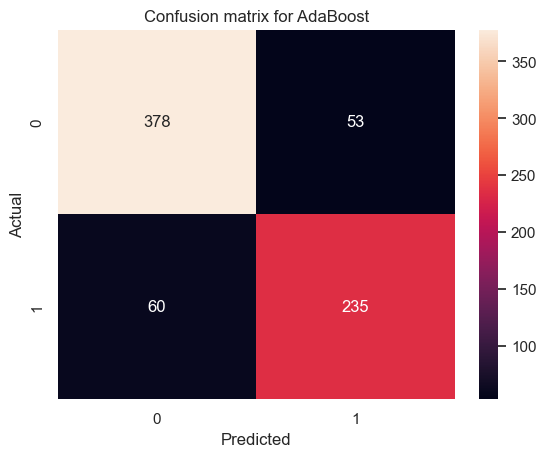

In [37]:
sb.heatmap(confusion_matrix(response_test, dectree_response_test_pred), annot = True, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for AdaBoost')
plt.show()

In [46]:
scores = cross_val_score(dectree, predictors_train, response_train, cv=10)
mse_train = np.mean(np.square(np.array(response_train) - np.array(dectree_response_train_pred)))

print("Explained Variance (R^2):\t", dectree.score(predictors_train, response_train))
print("Mean Squared Error (MSE):\t", mse_train)
print("Root Mean Squared Error (RMSE):\t", np.sqrt(mse_train), "\n")

print("Accuracy Score without CV: \t",accuracy_score(response_test, dectree_response_test_pred))
print("Accuracy Score with CV: \t",scores.mean())
print("Precision Score: \t\t", precision_score(response_test, dectree_response_test_pred, average = 'macro'))
print("Recall Score: \t\t\t", recall_score(response_test, dectree_response_test_pred, average = 'macro'))
print("F1 Score: \t\t\t", f1_score(response_test, dectree_response_test_pred, average = 'macro'))

Explained Variance (R^2):	 0.9862258953168044
Mean Squared Error (MSE):	 0.013774104683195593
Root Mean Squared Error (RMSE):	 0.11736313170325506 

Accuracy Score without CV: 	 0.8443526170798898
Accuracy Score with CV: 	 0.8257423865386894
Precision Score: 		 0.8394929604261796
Recall Score: 			 0.8368201659522592
F1 Score: 			 0.8380702173393837


#### Random Forest Classifier

In [12]:
randfclf = RandomForestClassifier(max_depth = 10, random_state = 0)
randfclf.fit(predictors_train, response_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [38]:
randfclf_response_train_pred = randfclf.predict(predictors_train)
randfclf_response_test_pred = randfclf.predict(predictors_test)

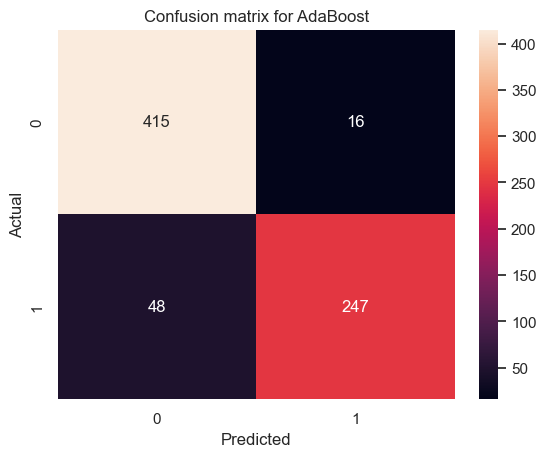

In [40]:
sb.heatmap(confusion_matrix(response_test, randfclf_response_test_pred), annot = True, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for AdaBoost')
plt.show()

In [44]:
scores = cross_val_score(randfclf, predictors_train, response_train, cv=10)
mse_train = np.mean(np.square(np.array(response_train) - np.array(randfclf_response_train_pred)))

print("Explained Variance (R^2):\t", randfclf.score(predictors_train, response_train))
print("Mean Squared Error (MSE):\t", mse_train)
print("Root Mean Squared Error (RMSE):\t", np.sqrt(mse_train), "\n")

print("Accuracy Score without CV:\t ",accuracy_score(response_test, randfclf_response_test_pred))
print("Accuracy Score with CV:\t\t ",scores.mean())
print("Precision Score:\t\t ", precision_score(response_test, randfclf_response_test_pred, average = 'macro'))
print("Recall Score:\t\t\t ", recall_score(response_test, randfclf_response_test_pred, average = 'macro'))
print("F1 Score:\t\t\t ", f1_score(response_test, randfclf_response_test_pred, average = 'macro'))

Explained Variance (R^2):	 0.9387052341597796
Mean Squared Error (MSE):	 0.06129476584022039
Root Mean Squared Error (RMSE):	 0.2475777975510332 

Accuracy Score without CV:	  0.9118457300275482
Accuracy Score with CV:		  0.8887664415215072
Precision Score:		  0.9177458959176802
Recall Score:			  0.9000825828778167
F1 Score:			  0.9068581463039138


In [33]:
clf.feature_importance_

AttributeError: 'function' object has no attribute 'feature_importance_'

#### AdaBoost

In [16]:
# Create AdaBoost model and fit it to the training data
ada = AdaBoostClassifier(n_estimators = 100, learning_rate = 1)
ada.fit(predictors_train, response_train)

# Predict on test set
ada_response_test_pred = ada.predict(predictors_test)

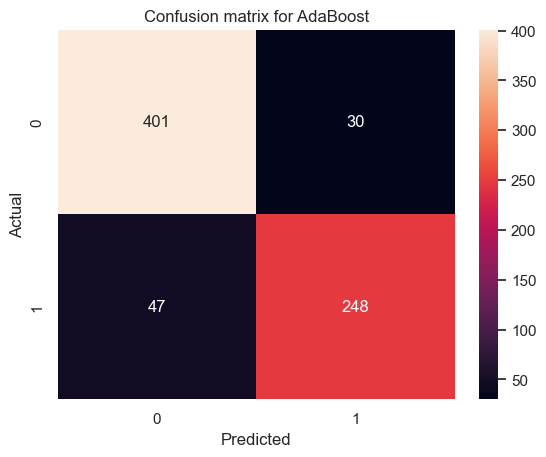

In [17]:
# Plot Confusion Matrix for AdaBoost Machine Learning Model
sb.heatmap(confusion_matrix(response_test, ada_response_test_pred), annot = True, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for AdaBoost')
plt.show()

In [18]:
# Evaluate Evaluation Metrics
ada_scores = cross_val_score(ada, predictors, response, cv = 10, scoring = "accuracy")
ada_mse = np.mean(np.square(np.array(response_test) - np.array(ada_response_test_pred)))

print("AdaBoost Machine Learning Model\n")
print("Explained Variance (R^2):\t", ada.score(predictors_test, response_test))
print("Root Mean Squared Error (RMSE):\t", np.sqrt(ada_mse))
print("Accuracy Score with CV:\t\t", ada_scores.mean())
print("Precision Score:\t\t", precision_score(response_test, ada_response_test_pred, average = "macro"))
print("Recall Score:\t\t\t", recall_score(response_test, ada_response_test_pred, average = "macro"))

AdaBoost Machine Learning Model

Explained Variance (R^2):	 0.8939393939393939
Root Mean Squared Error (RMSE):	 0.3256694736394648
Accuracy Score with CV:		 0.8895316804407714
Precision Score:		 0.8935878083247688
Recall Score:			 0.8855361988281096


#### XGBoost

In [19]:
# Create XGBoost model and fit it to the training data
xg = xgb.XGBClassifier(learning_rate = 0.1, n_estimators = 100)
xg.fit(predictors_train, response_train)

# Predict on test set
xg_response_test_pred = xg.predict(predictors_test)

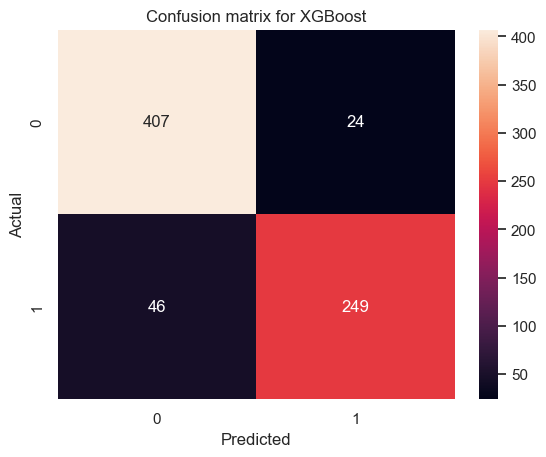

In [20]:
# Plot Confusion Matrix for XGBoost Machine Learning Model
sb.heatmap(confusion_matrix(response_test, xg_response_test_pred), annot = True, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for XGBoost')
plt.show()

In [21]:
# Evaluate Evaluation Metrics
xg_scores = cross_val_score(xg, predictors, response, cv = 10, scoring = "accuracy")
xg_mse = np.mean(np.square(np.array(response_test) - np.array(xg_response_test_pred)))

print("XGBoost Machine Learning Model\n")
print("Explained Variance (R^2):\t", xg.score(predictors_test, response_test))
print("Root Mean Squared Error (RMSE):\t", np.sqrt(xg_mse))
print("Accuracy Score with CV:\t\t", xg_scores.mean())
print("Precision Score:\t\t", precision_score(response_test, xg_response_test_pred, average = "macro"))
print("Recall Score:\t\t\t", recall_score(response_test, xg_response_test_pred, average = "macro"))

XGBoost Machine Learning Model

Explained Variance (R^2):	 0.9035812672176309
Root Mean Squared Error (RMSE):	 0.3105136595745333
Accuracy Score with CV:		 0.8955922865013773
Precision Score:		 0.9052713291123887
Recall Score:			 0.8941916709268944
